In [ ]:
!pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset (upload manually in Google Colab)
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv("spotify dataset.csv")

# Display basic info
df.info()
df.head()


Saving spotify dataset.csv to spotify dataset (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key    

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Saving spotify dataset.csv to spotify dataset (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key    

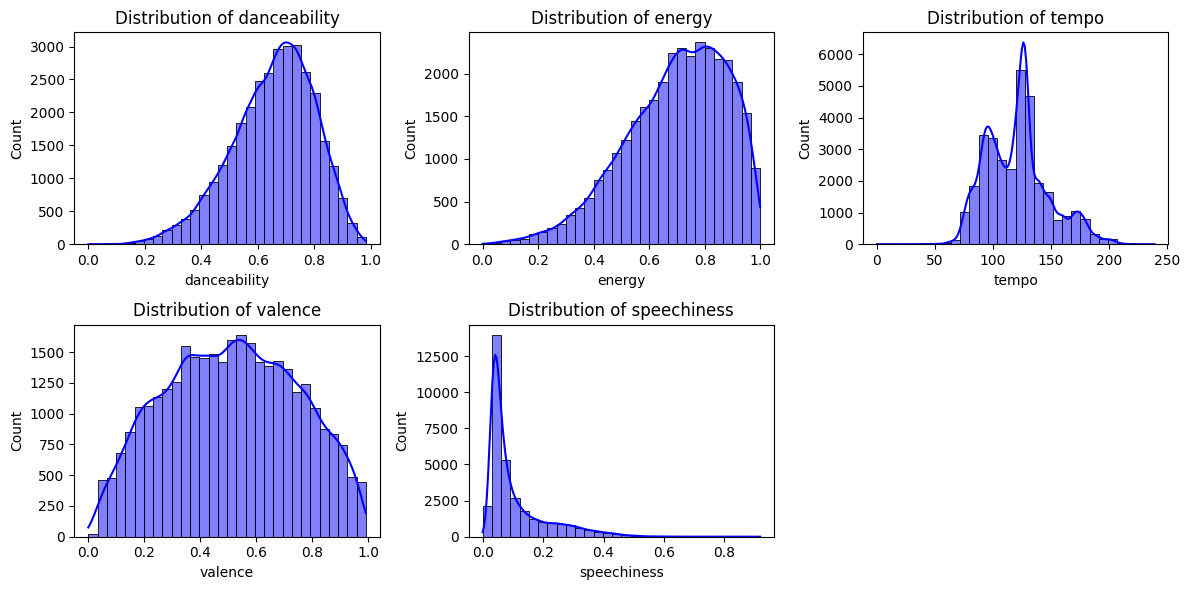

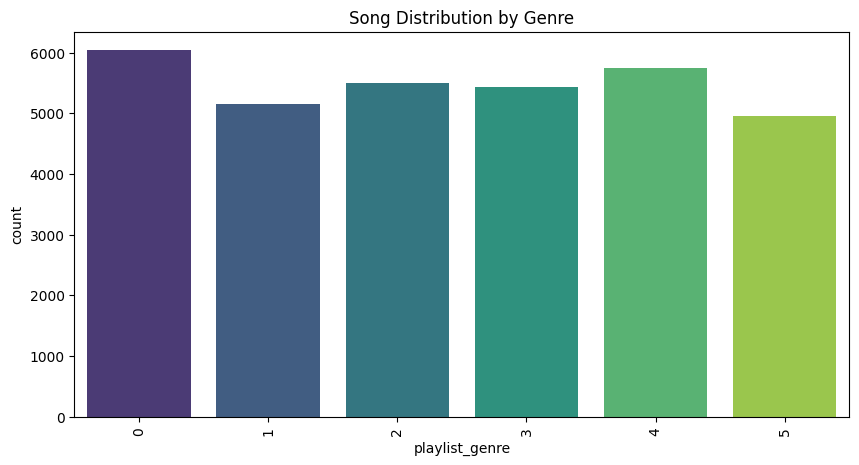

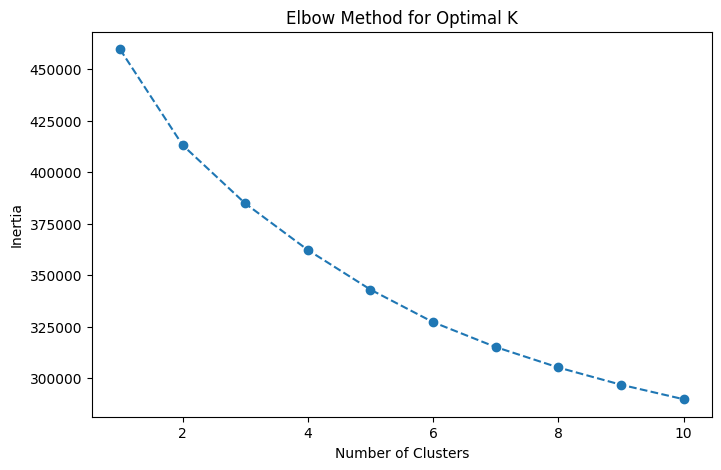

✅ K-Means model and scaler saved as 'kmeans_model.pkl' and 'scaler.pkl'


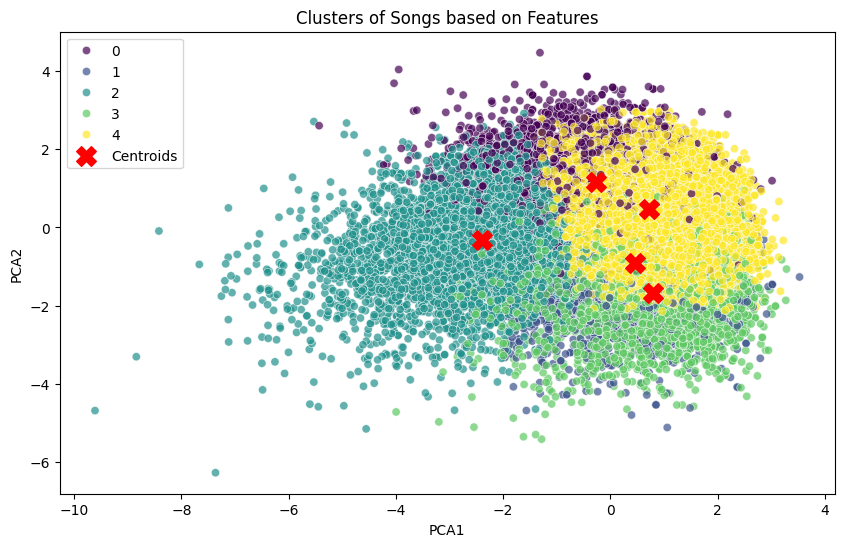

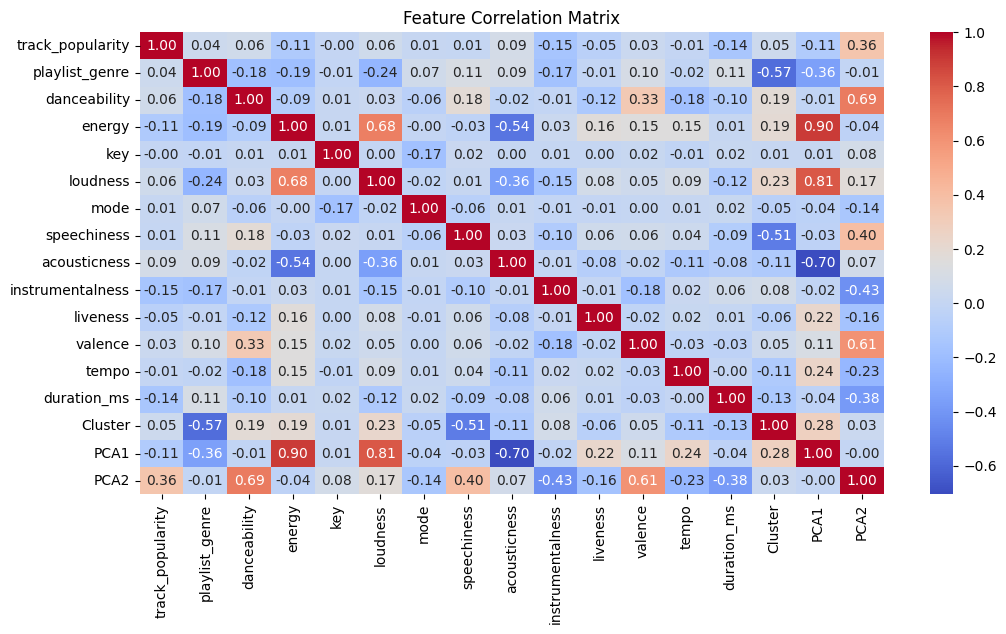

✅ Clustered dataset saved as 'spotify_clustered.csv'
🔍 Final Clustered Dataset Preview:
   track_popularity  playlist_genre  danceability  energy  key  loudness  \
0                66               2         0.748   0.916    6    -2.634   
1                67               2         0.726   0.815   11    -4.969   
2                70               2         0.675   0.931    1    -3.432   
3                60               2         0.718   0.930    7    -3.778   
4                69               2         0.650   0.833    1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

    

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,PCA1,PCA2
0,66,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,4,1.510121,0.904045
1,67,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,4,1.047067,1.181887
2,70,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,4,1.588894,1.048747
3,60,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,4,1.583115,0.323337
4,69,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,4,1.000706,0.756939


In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Load Dataset (Adjust file path if needed)
df = pd.read_csv("/content/spotify dataset.csv")

# Drop unnecessary text-heavy columns
columns_to_drop = [
    'track_id', 'track_name', 'track_artist', 'track_album_id',
    'track_album_name', 'track_album_release_date', 'playlist_name',
    'playlist_id', 'playlist_subgenre'
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values
df = df.dropna(subset=['danceability', 'energy', 'tempo', 'valence', 'speechiness'])

# Check if 'popularity' column exists
if 'popularity' not in df.columns:
    print("⚠️ Warning: 'popularity' column is missing from the dataset.")
else:
    print("✅ 'popularity' column is present.")

# Encode categorical data (convert genres to numerical values)
df['playlist_genre'] = df['playlist_genre'].astype('category').cat.codes

# Select only numerical features for scaling
numeric_df = df.select_dtypes(include=[np.number])

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Exploratory Data Analysis (EDA) & Visualizations

# Feature Distributions (Histograms)
features_to_plot = ['danceability', 'energy', 'tempo', 'valence', 'speechiness']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Genre & Playlist Analysis (Bar Plots)
plt.figure(figsize=(10, 5))
sns.countplot(x=df['playlist_genre'], palette='viridis')
plt.xticks(rotation=90)
plt.title("Song Distribution by Genre")
plt.show()

# Trends in Popularity (Scatter Plots)
if 'popularity' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['energy'], y=df['popularity'], alpha=0.5)
    plt.title("Energy vs Popularity")
    plt.xlabel("Energy")
    plt.ylabel("Popularity")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['danceability'], y=df['popularity'], alpha=0.5)
    plt.title("Danceability vs Popularity")
    plt.xlabel("Danceability")
    plt.ylabel("Popularity")
    plt.show()

# Find optimal clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Train K-Means Clustering Model (Adjust 'k' based on the elbow curve)
optimal_k = 5  # Change this value if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Save Model and Scaler as Pickle
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ K-Means model and scaler saved as 'kmeans_model.pkl' and 'scaler.pkl'")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

# Scatter Plot of Clusters with Centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)

# Plot centroids
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title('Clusters of Songs based on Features')
plt.legend()
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Save the clustered dataset for future use
df.to_csv("spotify_clustered.csv", index=False)
print("✅ Clustered dataset saved as 'spotify_clustered.csv'")

# Display final dataset output
print("🔍 Final Clustered Dataset Preview:")
print(df.head())

